In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.optimize import dual_annealing

In [2]:
from IPython.core.display import HTML

# Center plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
depths = pd.read_excel('depth-measurements.xlsx', sheet_name='Sheet1', header=0, index_col=0)
depths.tail()

,grind_setting,weight_in_grinder,weight_in_basket,depth_below_rim,notes
id,,,,,
65,5.25,15.19,15.17,15.03,NaN
66,5.25,15.10,15.01,15.41,NaN
67,5.75,15.12,15.01,14.96,NaN
68,5.75,15.15,15.12,14.86,NaN
69,5.75,15.11,15.01,15.27,NaN


In [4]:
basket_depth = 28.30
basket_diameter = 59.00
depths['bed_density'] = depths['weight_in_basket'] / ((basket_depth - depths['depth_below_rim']) * np.pi * (basket_diameter/2)**2) * 1000.
depths.tail()

,grind_setting,weight_in_grinder,weight_in_basket,depth_below_rim,notes,bed_density
id,,,,,,
65,5.25,15.19,15.17,15.03,NaN,0.418139
66,5.25,15.10,15.01,15.41,NaN,0.425926
67,5.75,15.12,15.01,14.96,NaN,0.411558
68,5.75,15.15,15.12,14.86,NaN,0.411489
69,5.75,15.11,15.01,15.27,NaN,0.421349


Text(0, 0.5, 'Puck Density (g/cm^3)')

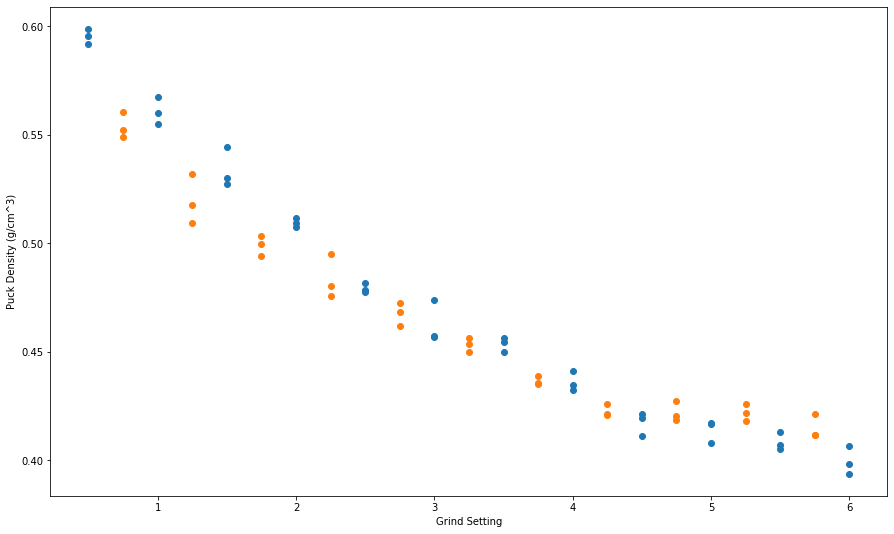

In [5]:
fig, ax = plt.subplots(figsize=(15,9))

xs = depths[(depths.index < 37)]['grind_setting'].to_numpy()
ys = depths[(depths.index < 37)]['bed_density'].to_numpy()

ax.scatter(xs, ys)

xs = depths[(depths.index >= 37)]['grind_setting'].to_numpy()
ys = depths[(depths.index >= 37)]['bed_density'].to_numpy()

ax.scatter(xs, ys)

ax.set_xlabel('Grind Setting')
ax.set_ylabel('Puck Density (g/cm^3)')